In [106]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, zscore

In [104]:
#Set plot style
sns.set(style='whitegrid')

In [110]:
# Load the dataset
df = pd.read_csv('house_price.csv')

In [112]:
# Q1: Basic EDA
print('Basic Information:')
print(df.info())
print('\nSummary Statistics:')
print(df.describe())
print('\nMissing Values:')
print(df.isnull().sum())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None

Summary Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2

In [114]:
# Creating a new column: price per square feet
df['price_per_sqft']=(df['price']*100000)/df['total_sqft']

In [116]:
# Drop rows with nulls in relevant columns
df.dropna(subset=['price_per_sqft'],inplace=True)

In [124]:
# Q2: Outlier Detection and Removal
# Mean and Standard Deviation
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
df_mean_std=df[(df['price_per_sqft']>(mean-3*std))&(df['price_per_sqft']<(mean+3*std))]

In [126]:
# Percentile Method (5% - 95%)
low = df['price_per_sqft'].quantile(0.05)
high = df['price_per_sqft'].quantile(0.95)
df_percentile = df[(df['price_per_sqft'] >= low) & (df['price_per_sqft'] <= high)]

In [128]:
# IQR Method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR =Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df_iqr = df[(df['price_per_sqft'] >= lower) & (df['price_per_sqft'] <= upper)]

In [130]:
# Z-score Method
z_scores = zscore(df['price_per_sqft'])
df_zscore = df[(np.abs(z_scores) < 3)]

In [132]:
# Q3: Box Plots to Compare Outlier Removal Methods
plt.figure(figsize=(16,8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

Text(0.5, 1.0, 'Original Data')

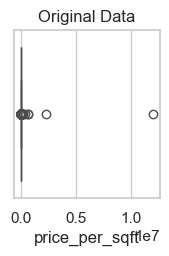

In [62]:
plt.subplot(2,3,1)
sns.boxplot(x=df['price_per_sqft'])
plt.title('Original Data')

Text(0.5, 1.0, 'Mean ± 3*STD')

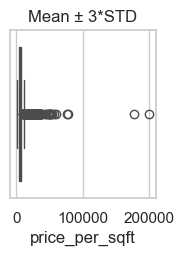

In [134]:
plt.subplot(2,3,2)
sns.boxplot(x=df_mean_std['price_per_sqft'])
plt.title('Mean ± 3*STD')

Text(0.5, 1.0, 'Percentile (5%-95%)')

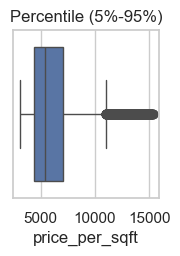

In [136]:
plt.subplot(2,3,3)
sns.boxplot(x=df_percentile['price_per_sqft'])
plt.title('Percentile (5%-95%)')

Text(0.5, 1.0, 'IQR Method')

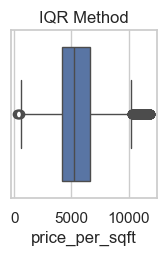

In [138]:
plt.subplot(2,3,4)
sns.boxplot(x=df_iqr['price_per_sqft'])
plt.title('IQR Method')

Text(0.5, 1.0, 'Z-Score Method')

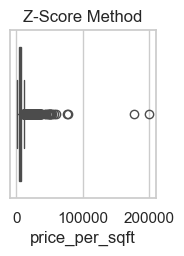

In [140]:
plt.subplot(2,3,5)
sns.boxplot(x=df_zscore['price_per_sqft'])
plt.title('Z-Score Method')

In [142]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [146]:
# Q4: Histplot, Normality, Transformation
# Before Transformation
print('Skewness Before:',skew(df['price_per_sqft']))
print('Kurtosis Before:',kurtosis(df['price_per_sqft']))

Skewness Before: 108.26875399964703
Kurtosis Before: 12090.634145107531


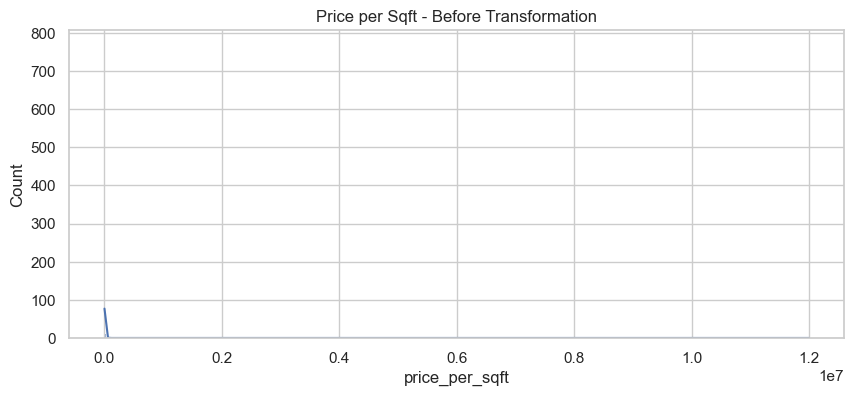

In [151]:
plt.figure(figsize=(10,4))
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Price per Sqft - Before Transformation")
plt.show()

In [152]:
# Log transformation
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])

In [153]:
# After Transformation
print('Skewness After:',skew(df['log_price_per_sqft']))
print('Kurtosis After:',kurtosis(df['log_price_per_sqft']))

Skewness After: 1.400591506829899
Kurtosis After: 9.204063649006573


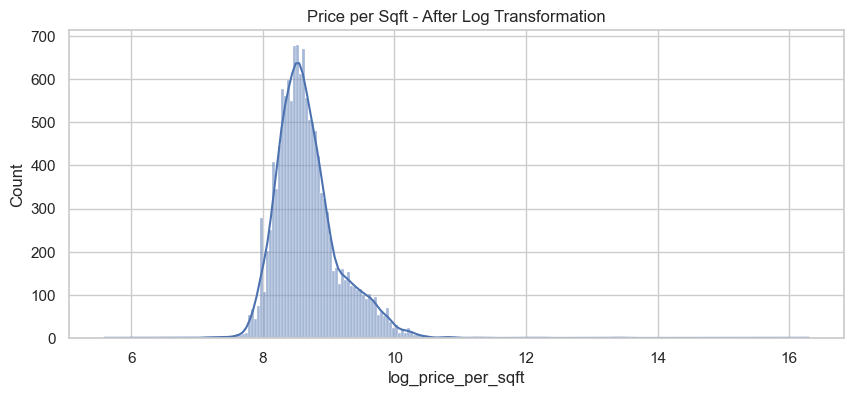

In [154]:
plt.figure(figsize=(10,4))
sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title('Price per Sqft - After Log Transformation')
plt.show()

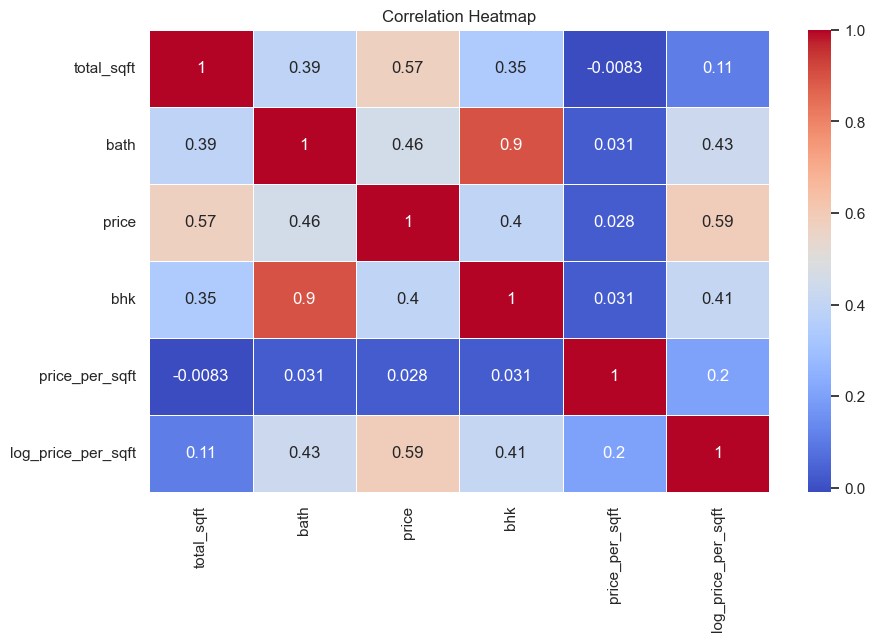

In [155]:
# Q5: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

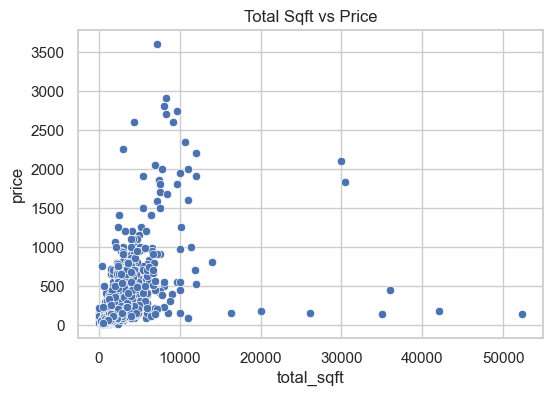

In [156]:
#Q6: Scatter Plots to Show Correlation
#Scatter: Total Sqft vs Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Total Sqft vs Price')
plt.show()

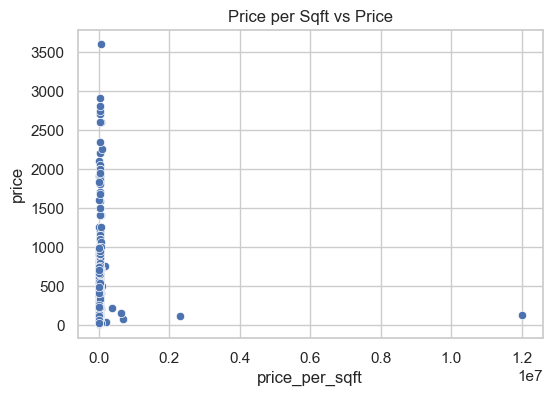

In [157]:
# Scatter: Price per Sqft vs Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='price_per_sqft', y='price', data=df)
plt.title('Price per Sqft vs Price')
plt.show()

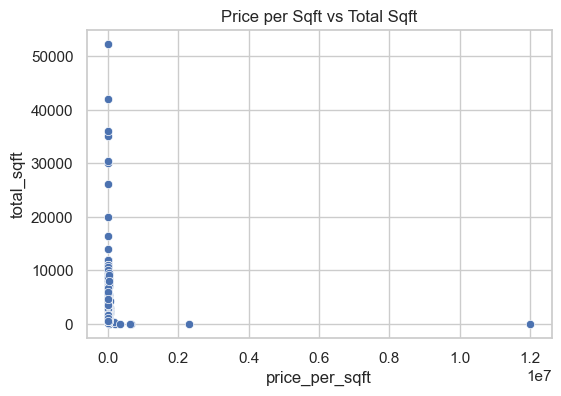

In [158]:
# Scatter: Price per Sqft vs Total Sqft
plt.figure(figsize=(6, 4))
sns.scatterplot(x='price_per_sqft', y='total_sqft', data=df)
plt.title('Price per Sqft vs Total Sqft')
plt.show()